# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Проверка качества классификатора
   4. Дополнительная проверка качества классификатора
   5. Правка багов и аномалий (тестирование и исправление ошибок)
   6. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой^ можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

По реальным наблюдениям мы имее следующие коэффициенты для каждого поколения:

                                                Для молодых особей:
$
\alpha_J = 0.0016,
\beta_J = 0.0000007,
\gamma_J = 0.00008,
\delta_J = 0.000016
$

                                                Для взрослых особей:
$
\alpha_A = 0.006,
\beta_A = 0.000000075,
\gamma_A = 0.004,
\delta_A = 0.00006
$

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны взять ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

                Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
                Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = -\int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $ - воспроизводство 

$ s = \gamma_{A}M_6 $ - уровень смертности молодых особей

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $ - созревание молодых особей

$ q = \gamma_{J}M_2 $ - уровень смертности взрослых особей

Теперь с полностью подготовленной математической частью мы создаем с помощью рандомной генерации в заданных диапазонах параметры $A$ и $B$ для каждой стадии, количество генерируемых стратегий выберем небольшим, чтобы не сильно нагружать оборудование. Далее мы в интегралы всех макропараметров подставляем известные значения и вычисляем их после чего имеем более простую формулу нахождения этих макропараметров:

$M_1 = \sigma_1(A_J + D)$

$M_2 = -\sigma_2(A_J+ D + B_J/2)$

$M_3 = -2(\pi B_J)^2$

$M_4 = -((A_J + D_0)^2 + B_J^2/2)$

$M_5 = \sigma_1(A_A + D)$

$M_6 = -\sigma_2(A_A + D + B_A/2)$

$M_7 = -2(\pi B_A)^2$

$M_8 = -((A_A + D_0)^2 + B_A^2/2)$

На следующем шаге мы считаем параметры $s,p,q,r$ и соответственно найти значения функции фитнеса $J$ и стоит добавить, что если подкоренное выражение окажется равным нулю, то мы заменим значение фитнеса не комплексным числом, а нулем. Далее мы считаем пары стратегий с известными значениями фитнеса для каждой стратегии и если $M_i(\upsilon) - M_j(\omega) < 0 $, то мы идентифицируем эту точку в класс $-1$, иначе мы определим ее в класс $1$. После у нас будет готова обучающая выборка для классификаторов и уже разделив ее на тестовую и обучающую мы сможем обучить наши классификаторы. На выходе они нам дадут 44 числа, которые являются коэффициентами при макропараметрах в неизвесной функции фитнеса:

$F = \sum_{i=1}^8 \lambda_i M_i + \sum_{i=1}^8 \sum_{j=1}^8 \lambda_{ij} M_i M_j$, где  $\lambda_{ij} =  \lambda_{ji}$

Концом данного этапа станет подсчет точности классификатора по с помощью стандартного подхода и логарифмической потери, а также создание двумерных и трехмерных графиков с разделяющими гиперплоскостями полученными с помощью классификаторов SMV и LDA.

## 2. Реализация

### 2.1 Исходные данные

In [42]:
#lam_M = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8']
#lam_M2, lam_MM = [], []
#for i in range(0, 8):
#    for j in range(0, 8):
#        if i == j:
#            lam_M2.append(lam_M[i]+lam_M[j])
#        else:
#            continue
#for i in range(1, 8):
#    for j in range(0, i):
#        lam_MM.append(lam_M[i]+lam_M[j])
#lam = lam_M + lam_M2 + lam_MM
#lam

In [43]:
# Обозначим эмпирические данные молодых и взрослых особей
# И затащим их в один массив
# lam = [alpha_j, gamma_j, betta_j, delta_j, alpha_a, gamma_a, betta_a, delta_a]
lam_M = [0.0016, 0.00008, 0.0000007, 0.000016, 0.006, 0.004, 0.000000075, 0.00006]
lam_M2, lam_MM = [], []
for i in range(0, 8):
    for j in range(0, 8):
        if i == j:
            lam_M2.append(lam_M[i]*lam_M[j])
        else:
            continue
for i in range(1, 8):
    for j in range(0, i):
        lam_MM.append(lam_M[i]*lam_M[j])
lam = lam_M + lam_M2 + lam_MM
# Сформируем вектор дополнительных данных 
sigma1, sigma2, D, D0 = 1, 1, 120, 70

# Количество генерируемых стратегий
Nmax = 40

### 2.2 Генерации стратегий

In [44]:
# Генерация параметров для стратегий
# Запись параметров в data_strat
import random as rn
import pandas as pd

def strategy(Nmax):
    def rand_strat_A():
        A = []
        for i in range(0, Nmax):
            a = rn.randint(-D*100, 0)
            A.append(a)
        return A
    def rand_strat_B(a):
        A, B = [], []
        for i in range(0, Nmax):
            b = rn.randint(-min(-a[i], a[i] + D*100), 0)
            A.append(a[i]/100)
            B.append(b/100)
            A.append(a[i]/100)
            B.append(-b/100)
        return A, B

    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat1 = {'Aj': A, 'Bj': B}
    data1 = pd.DataFrame(data = data_strat1)
    a = rand_strat_A()
    A, B = rand_strat_B(a)
    data_strat2 = {'Aa': A, 'Ba': B}
    data2 = pd.DataFrame(data = data_strat2)
    data = pd.concat([data1, data2], axis=1)
    data.to_csv("data_strat.csv", index=False)
    return data
    
data_strat = strategy(Nmax)
data_strat[:8]

,Aj,Bj,Aa,Ba
0,-70.62,-33.49,-31.13,-3.45
1,-70.62,33.49,-31.13,3.45
2,-15.15,-1.99,-115.89,-2.10
3,-15.15,1.99,-115.89,2.10
4,-19.07,-15.26,-61.00,-2.94
5,-19.07,15.26,-61.00,2.94
6,-9.56,-2.67,-46.51,-37.41
7,-9.56,2.67,-46.51,37.41


### 2.3 Подсчет макропараметров и создание выборки

In [45]:
# Подсчет макропараметров
# Запись их в data_macro
import pandas as pd
import numpy as np
from collections import defaultdict

def macroparams(data_strat):
   Aj = data_strat['Aj'].tolist()
   Bj = data_strat['Bj'].tolist()
   Aa = data_strat['Aa'].tolist()
   Ba = data_strat['Ba'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(len(data_strat)):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M5'].append(sigma1*(Aa[i] + D))

      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))

      collect['M3'].append(-2*(np.pi)*(np.pi)*Bj[i]*Bj[i])
      collect['M7'].append(-2*(np.pi)*(np.pi)*Ba[i]*Ba[i])
      
      collect['M4'].append(-((Aj[i] + D0)*(Aj[i] + D0) + (Bj[i]*Bj[i])/2))
      collect['M8'].append(-((Aa[i] + D0)*(Aa[i] + D0) + (Ba[i]*Ba[i])/2))

   for i in range(1, 9):
      for j in range(1, 9):
         if i == j == 1 or i == j == 5:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         elif i == j:
            Z = -np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            continue
   
   for i in range(2, 9):
      for j in range(1, i):
         if i == 5 and j == 1:
            Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
         else:
            Z = -np.abs(2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)]))
            collect_MM['M' + str(i) + 'M' + str(j)].append(list(Z))
            
   data_macro = {}   
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = collect['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = collect_M['M' + str(i) + 'M' + str(j)][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,49.38,-32.635,-22139.103782,-561.17445,88.87,-87.145,-234.945933,-1516.82815,2438.3844,-1065.043225,...,-2.636913e+05,-4.175929e+04,-4.094873e+04,-149801.948094,-99003.373350,-6.716243e+07,-1.702410e+06,-269601.035381,-264367.978264,-7.127452e+05
1,49.38,-66.125,-22139.103782,-561.17445,88.87,-90.595,-234.945933,-1516.82815,2438.3844,-4372.515625,...,-2.636913e+05,-4.175929e+04,-4.256985e+04,-149801.948094,-200600.522838,-6.716243e+07,-1.702410e+06,-269601.035381,-274834.092499,-7.127452e+05
2,104.85,-103.855,-78.169241,-3010.50255,4.11,-3.060,-87.049911,-2108.09710,10993.5225,-10785.861025,...,-5.241280e+05,-7.155503e+02,-5.327455e+02,-442067.961870,-437872.848641,-3.295767e+05,-1.269286e+07,-17328.558162,-12901.554252,-3.670193e+05
3,104.85,-105.845,-78.169241,-3010.50255,4.11,-5.160,-87.049911,-2108.09710,10993.5225,-11203.164025,...,-5.241280e+05,-7.155503e+02,-8.983551e+02,-442067.961870,-446263.075099,-3.295767e+05,-1.269286e+07,-17328.558162,-21755.562072,-3.670193e+05
4,100.93,-93.300,-4596.622180,-2710.29870,59.00,-57.530,-170.617825,-85.32180,10186.8649,-8704.890000,...,-9.248505e+05,-2.013290e+04,-1.963129e+04,-17223.058548,-15921.047880,-7.843842e+05,-4.624951e+05,-10067.972400,-9817.126308,-2.911484e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,74.44,-78.965,-1616.690549,-638.26485,76.27,-97.395,-35235.721412,-1582.64415,5541.3136,-6235.471225,...,-4.497944e+07,-5.374857e+06,-6.863566e+06,-235624.061052,-249946.990610,-5.117292e+06,-2.020292e+06,-241416.538641,-308283.253979,-1.115312e+08
76,9.59,-5.495,-1324.029144,-1666.50615,51.42,-31.935,-29977.164605,-761.34685,91.9681,-30.195025,...,-9.991426e+07,-3.082852e+06,-1.914642e+06,-14602.632583,-8367.201882,-2.016091e+06,-2.537578e+06,-78296.910054,-48627.223309,-4.564604e+07
77,9.59,-13.685,-1324.029144,-1666.50615,51.42,-70.905,-29977.164605,-761.34685,91.9681,-187.279225,...,-9.991426e+07,-3.082852e+06,-4.251062e+06,-14602.632583,-20838.063285,-2.016091e+06,-2.537578e+06,-78296.910054,-107966.596798,-4.564604e+07
78,17.36,-15.365,-314.250178,-1073.32965,51.84,-43.705,-5225.223206,-135.74205,301.3696,-236.083225,...,-1.121677e+07,-5.417511e+05,-4.567368e+05,-4712.963976,-4171.353197,-8.531393e+04,-2.913919e+05,-14073.735744,-11865.212591,-1.418565e+06


In [46]:
# Подсчет фитнесса
# Запись в data_fit_macro
import pandas as pd
from collections import defaultdict

def fitness():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   for i in range(len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]
      
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + (4*r*p + (p + q - s)**2)**0.5
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   #data = data.loc[data.J !=0]
   #data = data.reset_index(drop=True)
   data.to_csv('data_fit_macro.csv', index=False)
   return data

In [47]:
# Классификатор попарных стратегий
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
# Подсчет попарных стратегий
# Запись в data_fit_macro_target
def data_class():
   data_fit_macro = fitness()
   target = []
   for i in range(len(data_fit_macro.index)):
      for j in range(i + 1, len(data_fit_macro.index)):
         differ1_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         differ2_ = data_fit_macro.loc[j] - data_fit_macro.loc[i]
         target1_ = classificator(differ1_)
         target2_ = classificator(differ2_)
         target.append(differ1_.append(pd.Series(target1_, index =['target'])))
         target.append(differ2_.append(pd.Series(target2_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
data_fit_macro_target = data_class()
data_fit_macro_target


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,-0.025312,0.00,33.49,0.000000,0.0000,0.00,3.450,0.000000,0.00000,0.0000,...,0.000000e+00,1.621127e+03,0.000000,101597.149487,0.000000e+00,0.000000e+00,0.000000,10466.114235,0.000000e+00,-1.0
1,0.025312,0.00,-33.49,0.000000,0.0000,0.00,-3.450,0.000000,0.00000,0.0000,...,0.000000e+00,-1.621127e+03,0.000000,-101597.149487,0.000000e+00,0.000000e+00,0.000000,-10466.114235,0.000000e+00,1.0
2,0.803468,-55.47,71.22,-22060.934541,2449.3281,84.76,-84.085,-147.896022,591.26895,-8555.1381,...,-4.104374e+04,-4.041598e+04,292266.013776,338869.475290,-6.683285e+07,1.099045e+07,-252272.477219,-251466.424012,-3.457259e+05,1.0
3,-0.803468,55.47,-71.22,22060.934541,-2449.3281,-84.76,84.085,147.896022,-591.26895,8555.1381,...,4.104374e+04,4.041598e+04,-292266.013776,-338869.475290,6.683285e+07,-1.099045e+07,252272.477219,251466.424012,3.457259e+05,-1.0
4,0.803468,-55.47,73.21,-22060.934541,2449.3281,84.76,-81.985,-147.896022,591.26895,-8555.1381,...,-4.104374e+04,-4.005037e+04,292266.013776,347259.701748,-6.683285e+07,1.099045e+07,-252272.477219,-242612.416192,-3.457259e+05,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,-0.161396,7.77,-1.68,1009.778965,593.1765,0.42,27.200,24751.941399,625.60480,209.4015,...,2.541100e+06,3.794325e+06,9889.668607,16666.710088,1.930777e+06,2.246186e+06,64223.174310,96101.384208,4.422747e+07,-1.0
6316,0.038603,-7.77,5.67,-1009.778965,-593.1765,-0.42,-10.930,-24751.941399,-625.60480,-209.4015,...,-2.541100e+06,-3.624296e+06,-9889.668607,-15583.488529,-1.930777e+06,-2.246186e+06,-64223.174310,-91684.337901,-4.422747e+07,1.0
6317,-0.038603,7.77,-5.67,1009.778965,593.1765,0.42,10.930,24751.941399,625.60480,209.4015,...,2.541100e+06,3.624296e+06,9889.668607,15583.488529,1.930777e+06,2.246186e+06,64223.174310,91684.337901,4.422747e+07,-1.0
6318,-0.122793,0.00,3.99,0.000000,0.0000,0.00,16.270,0.000000,0.00000,0.0000,...,0.000000e+00,1.700288e+05,0.000000,1083.221559,0.000000e+00,0.000000e+00,0.000000,4417.046307,0.000000e+00,-1.0


In [48]:
# Нормируем макропараметры для увеличения скорости классификатора
# Запись нормированных данных в data_norm_with_target
import numpy as np
from collections import defaultdict

def macro_norm(data_param):
   target = data_param['target'].tolist()
   max_M = []
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      tmp = max(np.abs(data_param['M' + str(i)]))
      max_M.append(tmp)
      Z = np.array(data_param['M' + str(i)])/tmp
      data['M' + str(i)] = Z
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
            max_M.append(tmp)
            Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
            data['M' + str(i) + 'M' + str(j)] = Z
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         tmp = max(np.abs(data_param['M' + str(i) + 'M' + str(j)]))
         max_M.append(tmp)
         Z = np.array(data_param['M' + str(i) + 'M' + str(j)])/tmp
         data['M' + str(i) + 'M' + str(j)] = Z
   data['target'] = target
   data.to_csv("data_norm_with_target.csv", index=False)
   return data, max_M
   
data_norm, Max_M = macro_norm(data_fit_macro_target)
data_norm

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.000000,0.297134,0.000000,0.000000,0.000000,0.029429,0.000000,0.000000,0.000000,0.237227,...,0.000000,0.000236,0.000000,0.118427,0.000000,0.000000,0.000000,0.009717,0.000000,-1.0
1,0.000000,-0.297134,0.000000,0.000000,0.000000,-0.029429,0.000000,0.000000,0.000000,-0.237227,...,0.000000,-0.000236,0.000000,-0.118427,0.000000,0.000000,0.000000,-0.009717,0.000000,1.0
2,-0.505652,0.631887,-0.703387,0.551946,0.728304,-0.717265,-0.004198,0.130746,-0.630043,0.697221,...,-0.007636,-0.005888,0.404401,0.395004,-0.240656,0.395725,-0.235500,-0.233463,-0.003100,1.0
3,0.505652,-0.631887,0.703387,-0.551946,-0.728304,0.717265,0.004198,-0.130746,0.630043,-0.697221,...,0.007636,0.005888,-0.404401,-0.395004,0.240656,-0.395725,0.235500,0.233463,0.003100,-1.0
4,-0.505652,0.649543,-0.703387,0.551946,0.728304,-0.699352,-0.004198,0.130746,-0.630043,0.727152,...,-0.007636,-0.005835,0.404401,0.404784,-0.240656,0.395725,-0.235500,-0.225242,-0.003100,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,0.070830,-0.014906,0.032196,0.133670,0.003609,0.232023,0.702562,0.138339,0.015421,-0.003500,...,0.472776,0.552822,0.013684,0.019428,0.006952,0.080877,0.059953,0.089221,0.396609,-1.0
6316,-0.070830,0.050306,-0.032196,-0.133670,-0.003609,-0.093236,-0.702562,-0.138339,-0.015421,0.013437,...,-0.472776,-0.528049,-0.013684,-0.018165,-0.006952,-0.080877,-0.059953,-0.085120,-0.396609,1.0
6317,0.070830,-0.050306,0.032196,0.133670,0.003609,0.093236,0.702562,0.138339,0.015421,-0.013437,...,0.472776,0.528049,0.013684,0.018165,0.006952,0.080877,0.059953,0.085120,0.396609,-1.0
6318,0.000000,0.035401,0.000000,0.000000,0.000000,0.138787,0.000000,0.000000,0.000000,0.009936,...,0.000000,0.024773,0.000000,0.001263,0.000000,0.000000,0.000000,0.004101,0.000000,-1.0


### 2.4 Проверка корреляции

<Figure size 720x720 with 0 Axes>

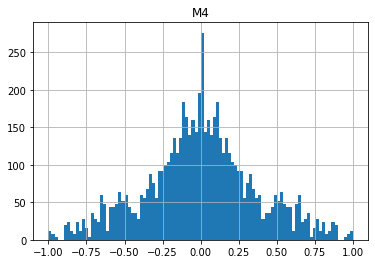

In [49]:
import matplotlib.pyplot as plt
histogram = data_norm[['M4']]
plt.figure(figsize=(10, 10))
histogram.hist(bins=100)
plt.show()

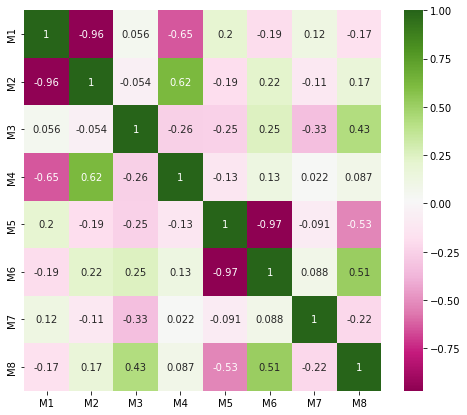

In [50]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

correlation = data_norm[['M' + str(i) for i in range(1, 9)]]
#correlation = data_norm
plt.figure(figsize=(8, 7))
sea.heatmap(correlation.corr(), annot=True, cmap="PiYG")
plt.savefig('Matrix_corr.jpg')

### 2.5 Реализация методов машинного обучения

In [51]:
# Разедляем данные на обучающую и тестовую выборки
import pandas as pd
from sklearn.model_selection import train_test_split

X = data_norm.drop('target', axis=1)
y = data_norm['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]

In [53]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получаем коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]

In [54]:
# Избавляемся от нормализованных коэффициентов
machine_SVM = [SVC_coef[i]/Max_M[i] for i in range(len(SVC_coef))]
machine_LDA = [LDA_coef[i]/Max_M[i] for i in range(len(LDA_coef))]

In [55]:
# Подсчет точности SVM и LDA
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test)*100)
print('     LDA: ', accuracy_score(LDA_prediction, y_test)*100)

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Logloss:')
print('     SVM: ', SVM.std())
print('     LDA: ', LDA.std())



Точность классификатора:
     SVM:  98.57594936708861
     LDA:  98.25949367088607
Logloss:
     SVM:  0.007920880386572042
     LDA:  0.005920343966414442


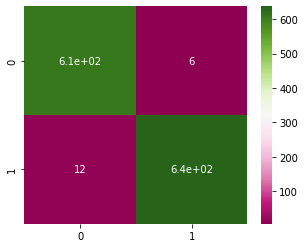

In [56]:
# Подсчет матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sea
plt.figure(figsize=(5, 4))
cnf_matrix = confusion_matrix(y_test, SVC_prediction)
sea.heatmap(cnf_matrix, annot=True, cmap="PiYG")
plt.savefig('Matrix_error.jpg')

### 2.6 Графики 

#### 2.6.1 Двумерные

In [57]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [58]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 8):
#     for j in range(i + 1, 7):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='x')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='.')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='Гиперплоскость созданная SVM')
#         plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='Гиперплоскость созданная LDA')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

#### 2.6.2 Трехмерные

In [59]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(len(X.columns)):
#         for k in range(len(X.columns)):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.legend()
#             plt.grid()
#             plt.show()

In [60]:
# # Вывод части графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8M7']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(0, 5):
#     for j in range(0, 4):
#         for k in range(0, 3):
#             if i == j or j == k or i == k:
#                 continue
#             u, v = np.mgrid[-1:1:20j, -1:1:20j]
#             fig = plt.figure(figsize=(10, 10))
#             ax = fig.add_subplot(111, projection='3d')
#             ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='x')
#             ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='.')
#             ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
#             ax.set_xlabel(X.columns[i])
#             ax.set_ylabel(X.columns[j])
#             ax.set_zlabel(X.columns[k])
#             plt.grid()
#             plt.show()

# Этап 2 | Проверка по Тейлору | Поиск оптимальной траектории | Финальная проверка

## 1. Теоретический модуль

Для проверки качества классификатора мы воспользуемся разложением по Тейлору до второго порядка функции $J$ в окрестности точки с наибольшим значением фитнеса, раскладывать будем по $s,p,q,r$. В качестве средний точки будем брать $s_0,p_0,q_0,r_0$, а подсчитанную производную в этой точке назовем $h$, тогда:

$J = h_ss + h_pp + h_qq + h_rr + h_{ss}s^2 + h_{pp}p^2 + h_{qq}q^2 + h_{rr}r^2 + h_{sp}sp + h_{sq}sq + h_{sr}sr + h_{pq}pq + h_{pr}pr + h_{qr}qr$

*Тут мы опустили из рассмотрения нулевую производную и прочие числа

$ r = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $

$ s = \gamma_{A}M_6 $

$ p = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $

$ q = \gamma_{J}M_2 $

Теперь подставив заместо $s,p,q,r$ их определения через макропараметры мы получим функцию зависимую от $M$ с какими-то коэффициентами и их мы сравним с $\lambda$ и проверим качество классификатора (Стоит сделать уточнение, что мы рассматриваем результаты только одного классификатора - SVM, так как LDA показал потерю точности при большом размере выборки и дальнейшая работа с ним дала бы слишком большие неточности) 

## 2. Проверка по Тейлору функции фитнеса J 

### 2.1 Вывод частных производных

Найдем все производные вплоть до 2 порядка, дифференцируя $J$ по частным производным $s,p,q,r$ 

$ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

                        Производные 1-го порядка:
$$
h_s = \frac{-p-q+s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_p = \frac{2r + p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1
$$
$$
h_q = \frac{p+q-s}{\sqrt[2]{4rp+(p+q-s)^2}} - 1\ \ \ \ \ \ h_r = \frac{2p}{\sqrt[2]{4rp+(p+q-s)^2}}
$$

                        Производные 2-го порядка:
$$
h_{ss} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pp} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{rr} = \frac{-4p^2}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$

                        Смешанные производные:
$$
h_{sp} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sq} = \frac{-1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(-p-q+s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{sr} = \frac{-2p(-p-q+s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pq} = \frac{1}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{(2r+p+q-s)(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{pr} = \frac{2}{\sqrt[2]{4rp+(p+q-s)^2}} - \frac{2p(2r+p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$
$$
h_{qr} = \frac{-2p(p+q-s)}{(\sqrt[2]{4rp+(p+q-s)^2})^{1.5}}
$$


### 2.2 Реализация проверок

In [61]:
# Считаем значения искомого фитнеса
import pandas as pd
import numpy as np

def middle_SPQR():
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   data = {}
   data_middle_SPQR = pd.DataFrame(data)
   for i in range(0, len(data_strat)):
      p = lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]
      q = lam[1]*M2[i]
      r = lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]
      s = lam[5]*M6[i]

      if ((4*r*p + (p + q - s)**2) < 0):
         row = {'J': 0, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         row = {'J': j, 'S': s, 'P': p, 'Q': q, 'R': r}
         data_middle_SPQR = data_middle_SPQR.append(row, ignore_index=True)
   data_middle_SPQR.to_csv("data_middle_SPQR.csv", index=False)
   data_middle_SPQR = data_middle_SPQR.sort_values(by='J', ascending=False)
   return data_middle_SPQR
data_SPQR = middle_SPQR()

In [62]:
# Считаем значения восстановленного фитнеса SVM
from numpy import dot
import pandas as pd

def fitness_restored_SVM():
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    data = {}
    restored_fit = pd.DataFrame(data)
    J = []
    for i in range(len(data_macro)):
        j = (dot(data_macro.loc[i], machine_SVM))
    
        p = machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i]
        q = machine_SVM[1]*M2[i]
        r = machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]
        s = machine_SVM[5]*M6[i]

        rr = (machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])**2
        ss = (machine_SVM[5]*M6[i])**2
        pp = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])**2
        qq = (machine_SVM[1]*M2[i])**2
        
        sp = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[5]*M6[i])
        sq = (machine_SVM[5]*M6[i])*(machine_SVM[1]*M2[i])
        sr = (machine_SVM[5]*M6[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        pq = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[1]*M2[i])
        pr = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        qr = (machine_SVM[1]*M2[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])
        row = {'F_SVM': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': ss, 'PP': pp, 'QQ': qq, 
               'RR': rr, 'SP': sp, 'SQ': sq, 'SR': sr, 'PQ': pq, 'PR': pr, 'QR': qr}
        restored_fit = restored_fit.append(row, ignore_index=True)
    restored_fit.to_csv('data_dot.csv', index=False)
    restored_fit = restored_fit.sort_values(by='F_SVM', ascending=False)
    #restored_fit = restored_fit.reset_index(drop=True)
    return restored_fit
restored_fit_SVM = fitness_restored_SVM()

In [63]:
# Считаем значения восстановленного фитнеса LDA
from numpy import dot
import pandas as pd

def fitness_restored_LDA():
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    data = {}
    restored_fit = pd.DataFrame(data)
    J = []
    for i in range(len(data_macro)):
        j = (dot(data_macro.loc[i], machine_LDA))
    
        p = machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i]
        q = machine_LDA[1]*M2[i]
        r = machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i]
        s = machine_LDA[5]*M6[i]

        rr = (machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])**2
        ss = (machine_LDA[5]*M6[i])**2
        pp = (machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])**2
        qq = (machine_LDA[1]*M2[i])**2
        
        sp = (machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[5]*M6[i])
        sq = (machine_LDA[5]*M6[i])*(machine_LDA[1]*M2[i])
        sr = (machine_LDA[5]*M6[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])
        pq = (machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[1]*M2[i])
        pr = (machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])
        qr = (machine_LDA[1]*M2[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])
        row = {'F_LDA': j, 'S': s, 'P': p, 'Q': q, 'R': r, 'SS': ss, 'PP': pp, 'QQ': qq, 
               'RR': rr, 'SP': sp, 'SQ': sq, 'SR': sr, 'PQ': pq, 'PR': pr, 'QR': qr}
        restored_fit = restored_fit.append(row, ignore_index=True)
    restored_fit.to_csv('data_dot.csv', index=False)
    restored_fit = restored_fit.sort_values(by='F_LDA', ascending=False)
    #restored_fit = restored_fit.reset_index(drop=True)
    return restored_fit
restored_fit_LDA = fitness_restored_LDA()

In [64]:
# Реализация косинуса между двумя векторами
from numpy import sqrt

def cosine(a, b):
    #! Числитель
    def numerator(a, b):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*b[i]
        return summ
    #! Знаминатель
    def denominator(a):
        summ = 0
        for i in range(len(a)):
            summ += a[i]*a[i]
        return summ
    return numerator(a, b)/sqrt(denominator(a) * denominator(b))

In [65]:
# Подсчет частных производных искомого фитнеса
import pandas as pd
import numpy as np

def differential(i):
    s = data_SPQR['S'].tolist()[i]
    p = data_SPQR['P'].tolist()[i]
    q = data_SPQR['Q'].tolist()[i]
    r = data_SPQR['R'].tolist()[i]
    
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

In [66]:
# Функция подсчета косинусов между векторами и нахождение стратегии с максимальными сходством по косинусу
def corners():
   cos = []
   coef = [0]*44
   for i in range(len(data_strat)):
      hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(i)
      coef[0] = lam[0]*hp            #M1
      coef[1] = lam[1]*hq            #M2
      coef[2] = lam[2]*hp            #M3
      coef[3] = lam[3]*hp            #M4
      coef[4] = lam[4]*hr            #M5
      coef[5] = lam[5]*hs            #M6
      coef[6] = lam[6]*hr            #M7
      coef[7] = lam[7]*hr            #M8
      coef[8] = lam[8]*hpp           #M11
      coef[9] = lam[9]*hqq           #M22
      coef[10] = lam[10]*hpp         #M33
      coef[11] = lam[11]*hpp         #M44
      coef[12] = lam[12]*hrr         #M55
      coef[13] = lam[13]*hss         #M66
      coef[14] = lam[14]*hrr         #M77
      coef[15] = lam[15]*hrr         #M88
      coef[16] = lam[16]*hpq         #M12
      coef[17] = lam[17]*hpp         #M13
      coef[18] = lam[18]*hpq         #M23
      coef[19] = lam[19]*hpp         #M14
      coef[20] = lam[20]*hpq         #M24
      coef[21] = lam[21]*hpp         #M34
      coef[22] = lam[22]*hpr         #M15
      coef[23] = lam[23]*hqr         #M25
      coef[24] = lam[24]*hpr         #M35
      coef[25] = lam[25]*hpr         #M45
      coef[26] = lam[26]*hsp         #M16
      coef[27] = lam[27]*hsq         #M26
      coef[28] = lam[28]*hsp         #M36
      coef[29] = lam[29]*hsp         #M46
      coef[30] = lam[30]*hsr         #M56
      coef[31] = lam[31]*hpr         #M17
      coef[32] = lam[32]*hqr         #M27
      coef[33] = lam[33]*hpr         #M37
      coef[34] = lam[34]*hpr         #M47
      coef[35] = lam[35]*hrr         #M57
      coef[36] = lam[36]*hsr         #M67
      coef[37] = lam[37]*hpr         #M18
      coef[38] = lam[38]*hqr         #M28
      coef[39] = lam[39]*hpr         #M38
      coef[40] = lam[40]*hpr         #M48
      coef[41] = lam[41]*hrr         #M58
      coef[42] = lam[42]*hsr         #M68
      coef[43] = lam[43]*hrr         #M78
      cos.append(cosine(coef, machine_SVM))
   best_index = cos.index(max([i for i in cos if not isinstance(i, complex)]))
   result = [i for i in cos if not isinstance(i, complex)]
   best_corn = max(np.abs(result))
   return best_index
best_index = corners()


In [67]:
hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
coef = [0]*44
coef[0] = lam[0]*hp            #M1
coef[1] = lam[1]*hq            #M2
coef[2] = lam[2]*hp            #M3
coef[3] = lam[3]*hp            #M4
coef[4] = lam[4]*hr            #M5
coef[5] = lam[5]*hs            #M6
coef[6] = lam[6]*hr            #M7
coef[7] = lam[7]*hr            #M8
coef[8] = lam[8]*hpp           #M11
coef[9] = lam[9]*hqq           #M22
coef[10] = lam[10]*hpp         #M33
coef[11] = lam[11]*hpp         #M44
coef[12] = lam[12]*hrr         #M55
coef[13] = lam[13]*hss         #M66
coef[14] = lam[14]*hrr         #M77
coef[15] = lam[15]*hrr         #M88
coef[16] = lam[16]*hpq         #M12
coef[17] = lam[17]*hpp         #M13
coef[18] = lam[18]*hpq         #M23
coef[19] = lam[19]*hpp         #M14
coef[20] = lam[20]*hpq         #M24
coef[21] = lam[21]*hpp         #M34
coef[22] = lam[22]*hpr         #M15
coef[23] = lam[23]*hqr         #M25
coef[24] = lam[24]*hpr         #M35
coef[25] = lam[25]*hpr         #M45
coef[26] = lam[26]*hsp         #M16
coef[27] = lam[27]*hsq         #M26
coef[28] = lam[28]*hsp         #M36
coef[29] = lam[29]*hsp         #M46
coef[30] = lam[30]*hsr         #M56
coef[31] = lam[31]*hpr         #M17
coef[32] = lam[32]*hqr         #M27
coef[33] = lam[33]*hpr         #M37
coef[34] = lam[34]*hpr         #M47
coef[35] = lam[35]*hrr         #M57
coef[36] = lam[36]*hsr         #M67
coef[37] = lam[37]*hpr         #M18
coef[38] = lam[38]*hqr         #M28
coef[39] = lam[39]*hpr         #M38
coef[40] = lam[40]*hpr         #M48
coef[41] = lam[41]*hrr         #M58
coef[42] = lam[42]*hsr         #M68
coef[43] = lam[43]*hrr         #M78
coef_1 = np.array(coef)*10
print(cosine(coef_1, machine_SVM))
q = {'Тейлор': coef_1, 'SVM': machine_SVM, 'LDA': machine_LDA}
df = pd.DataFrame(q)
df

0.9762335593506829


,Тейлор,SVM,LDA
0,9.598450e-03,6.265257e-06,2.184321e-03
1,-1.738662e-04,-7.048833e-03,-4.241859e-03
2,4.199322e-06,1.606935e-05,7.665879e-05
3,9.598450e-05,5.438015e-05,4.665046e-04
4,2.844457e-02,1.415156e-02,1.513789e-02
5,-7.130669e-02,-5.682338e-02,-9.886837e-02
6,3.555571e-07,1.724803e-05,2.456501e-05
7,2.844457e-04,-6.360945e-05,-4.048701e-04
8,-2.295651e-04,-3.595503e-06,-1.412671e-05
9,1.425618e-07,4.119859e-05,1.217281e-05


In [68]:
def ggdd1(ju):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()
    M3 = data_macro['M3'].tolist()
    M4 = data_macro['M4'].tolist()
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    
    hs_ = (machine_SVM[5]*M6[ju])/(lam[5]*M6[ju])
    hp_ = (machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq_ = (machine_SVM[1]*M2[i])/(lam[1]*M2[i])
    hr_ = (machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss_ = ((machine_SVM[5]*M6[i])*(machine_SVM[5]*M6[i]))/((lam[5]*M6[i])*(lam[5]*M6[i]))
    hpp_ = ((machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hqq_ = ((machine_SVM[1]*M2[i])*(machine_SVM[1]*M2[i]))/((lam[1]*M2[i])*(lam[1]*M2[i]))
    hrr_ = ((machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]))/((lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hsp_ = ((machine_SVM[5]*M6[i])*(machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i]))/((lam[5]*M6[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq_ = ((machine_SVM[5]*M6[i])*(machine_SVM[1]*M2[i]))/((lam[5]*M6[i])*(lam[1]*M2[i]))
    hsr_ = ((machine_SVM[5]*M6[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq_ = ((machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr_ = ((machine_SVM[0]*M1[i] + machine_SVM[2]*M3[i] + machine_SVM[3]*M4[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr_ = ((machine_SVM[1]*M2[i])*(machine_SVM[4]*M5[i] + machine_SVM[6]*M7[i] + machine_SVM[7]*M8[i]))/((lam[1]*M2[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_

def ggdd2(ju):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()
    M3 = data_macro['M3'].tolist()
    M4 = data_macro['M4'].tolist()
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    
    hs_ = (machine_LDA[5]*M6[ju])/(lam[5]*M6[ju])
    hp_ = (machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq_ = (machine_LDA[1]*M2[i])/(lam[1]*M2[i])
    hr_ = (machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss_ = ((machine_LDA[5]*M6[i])*(machine_LDA[5]*M6[i]))/((lam[5]*M6[i])*(lam[5]*M6[i]))
    hpp_ = ((machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hqq_ = ((machine_LDA[1]*M2[i])*(machine_LDA[1]*M2[i]))/((lam[1]*M2[i])*(lam[1]*M2[i]))
    hrr_ = ((machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i]))/((lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hsp_ = ((machine_LDA[5]*M6[i])*(machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i]))/((lam[5]*M6[i])*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq_ = ((machine_LDA[5]*M6[i])*(machine_LDA[1]*M2[i]))/((lam[5]*M6[i])*(lam[1]*M2[i]))
    hsr_ = ((machine_LDA[5]*M6[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq_ = ((machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr_ = ((machine_LDA[0]*M1[i] + machine_LDA[2]*M3[i] + machine_LDA[3]*M4[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr_ = ((machine_LDA[1]*M2[i])*(machine_LDA[4]*M5[i] + machine_LDA[6]*M7[i] + machine_LDA[7]*M8[i]))/((lam[1]*M2[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_

hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(best_index)
hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = ggdd1(best_index)
hs1_, hp1_, hq1_, hr1_, hss1_, hpp1_, hqq1_, hrr1_, hsp1_, hsq1_, hsr1_, hpq1_, hpr1_, hqr1_ = ggdd2(best_index)

df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_, hp1_ /hp1_],
                 ['hq',  hq /hp,  hq_ /hp_, hq1_ /hp1_],
                 ['hr',  hr /hp,  hr_ /hp_, hr1_ /hp1_],
                 ['hs',  hs /hp,  hs_ /hp_, hs1_ /hp1_],
                 ['hpp', hpp/hp,  hpp_/hp_, hpp1_/hp1_],
                 ['hqq', hqq/hp,  hqq_/hp_, hqq1_/hp1_],
                 ['hrr', hrr/hp,  hrr_/hp_, hrr1_/hp1_],
                 ['hss', hss/hp,  hss_/hp_, hss1_/hp1_],
                 ['hsp', hsp/hp,  hsp_/hp_, hsp1_/hp1_],
                 ['hsq', hsq/hp,  hsq_/hp_, hsq1_/hp1_],
                 ['hsr', hsr/hp,  hsr_/hp_, hsr1_/hp1_],
                 ['hpq', hpq/hp,  hpq_/hp_, hpq1_/hp1_],
                 ['hpr', hpr/hp,  hpr_/hp_, hpr1_/hp1_],
                 ['hqr', hqr/hp,  hqr_/hp_, hqr1_/hp1_],
                 ], 
    columns=['h', 'Тейлор', 'SVC', 'LDA'])
df

,h,Тейлор,SVC,LDA
0,hp,1.000000,1.000000,1.000000
1,hq,-0.362280,51.922098,4.244461
2,hr,0.790254,-1.041808,-0.206975
3,hs,-2.971592,8.371285,1.978580
4,hpp,-14.948061,-1.696973,-12.492337
5,hqq,3.713147,-4574.877227,-225.055055
6,hrr,-2.153985,-1.841835,-0.535154
7,hss,3.713147,-118.921176,-48.904755
8,hsp,2.417004,-14.205845,-24.717093
9,hsq,-3.713147,-737.597302,-104.910735


In [69]:
# # Вывод всех графиков
# import matplotlib.pyplot as plt
# X=data_norm.loc[:,'M1':'M8']
# y=data_norm.loc[:,'target']
# X1 = X[y==1]
# X0 = X[y==-1]
# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
#         plt.plot(x, (-1)* (coef[i]*Max_M[i]) / (coef[j]*Max_M[j]) * x, label='true')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()

In [70]:
def gdrf(i):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()

    hs_ = (machine[5]*M6[i])/(lam[5]*M6[i])
    hp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])
    hq_ = (machine[1]*M2[i])/(lam[1]*M2[i])
    hr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])
    hss_ = (machine[5]*M6[i])**2/(lam[5]*M6[i])**2
    hpp_ = (machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2/(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2
    hqq_ = (machine[1]*M2[i])**2/(lam[1]*M2[i])**2
    hrr_ = (machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2/(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2
    hsp_ = (machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))/(lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))
    hsq_ = (machine[5]*M6[i]*machine[1]*M2[i])/(lam[5]*M6[i]*lam[1]*M2[i])
    hsr_ = ((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hpq_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))
    hpr_ = ((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))
    hqr_ = (machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))/(lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))

    # hs_ = (lam[5]*M6[i])/(machine[5]*M6[i])
    # hp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])
    # hq_ = (lam[1]*M2[i])/(machine[1]*M2[i])
    # hr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
    # hss_ = (lam[5]*M6[i])**2/(machine[5]*M6[i])**2
    # hpp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2
    # hqq_ = (lam[1]*M2[i])**2/(machine[1]*M2[i])**2
    # hrr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2
    # hsp_ = (lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))/(machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))
    # hsq_ = (lam[5]*M6[i]*lam[1]*M2[i])/(machine[5]*M6[i]*machine[1]*M2[i])
    # hsr_ = ((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    # hpq_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))
    # hpr_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    # hqr_ = (lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/(machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    print(hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_)
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_


#hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
#hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = gdrf(ju)
#h1 = [hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr]
#h2 = [hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_]
#print('------------------------------------')
#print(hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr)
#print('------------------------------------')
#print('Косинус = ', cosine(h1, h2))
#df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_],
#                 ['hq',  hq /hp,  hq_ /hp_],
#                 ['hr',  hr /hp,  hr_ /hp_],
#                 ['hs',  hs /hp,  hs_ /hp_],
#                 ['hpp', hpp/hp,  hpp_/hp_],
#                 ['hqq', hqq/hp,  hqq_/hp_],
#                 ['hrr', hrr/hp,  hrr_/hp_],
#                 ['hss', hss/hp,  hss_/hp_],
#                 ['hsp', hsp/hp,  hsp_/hp_],
#                 ['hsq', hsq/hp,  hsq_/hp_],
#                 ['hsr', hsr/hp,  hsr_/hp_],
#                 ['hpq', hpq/hp,  hpq_/hp_],
#                 ['hpr', hpr/hp,  hpr_/hp_],
#                 ['hqr', hqr/hp,  hqr_/hp_],
#                 ], 
#    columns=['id','Тейлор', 'SVC'])
#df

In [71]:
def gdrfsadas(i):
    M1 = data_macro['M1'].tolist()
    M2 = data_macro['M2'].tolist()      
    M3 = data_macro['M3'].tolist()   
    M4 = data_macro['M4'].tolist()   
    M5 = data_macro['M5'].tolist()
    M6 = data_macro['M6'].tolist()
    M7 = data_macro['M7'].tolist()
    M8 = data_macro['M8'].tolist()
    p = machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]
    q = machine[1]*M2[i]
    r = machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]
    s = machine[5]*M6[i]

    hs_ = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp_ = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq_ = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr_ = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss_ = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp_ = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq_ = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr_ = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp_ = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq_ = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr_ = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq_ = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr_ = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr_ = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

    #hs_ = (lam[5]*M6[i])/(machine[5]*M6[i])
    #hp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])
    #hq_ = (lam[1]*M2[i])/(machine[1]*M2[i])
    #hr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])
    #hss_ = (lam[5]*M6[i])**2/(machine[5]*M6[i])**2
    #hpp_ = (lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])**2/(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])**2
    #hqq_ = (lam[1]*M2[i])**2/(machine[1]*M2[i])**2
    #hrr_ = (lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i])**2/(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i])**2
    #hsp_ = (lam[5]*M6[i]*(lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i]))/(machine[5]*M6[i]*(machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i]))
    #hsq_ = (lam[5]*M6[i]*lam[1]*M2[i])/(machine[5]*M6[i]*machine[1]*M2[i])
    #hsr_ = ((lam[5]*M6[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[5]*M6[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    #hpq_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[1]*M2[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[1]*M2[i]))
    #hpr_ = ((lam[0]*M1[i] + lam[2]*M3[i] + lam[3]*M4[i])*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/((machine[0]*M1[i] + machine[2]*M3[i] + machine[3]*M4[i])*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    #hqr_ = (lam[1]*M2[i]*(lam[4]*M5[i] + lam[6]*M7[i] + lam[7]*M8[i]))/(machine[1]*M2[i]*(machine[4]*M5[i] + machine[6]*M7[i] + machine[7]*M8[i]))
    print(hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_)
    return hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_


# hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr = differential(ju)
# hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_ = gdrfsadas(ju)
# h1 = [hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr]
# h2 = [hs_, hp_, hq_, hr_, hss_, hpp_, hqq_, hrr_, hsp_, hsq_, hsr_, hpq_, hpr_, hqr_]
# print('------------------------------------')
# print(hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr)
# print('Косинус = ', cosine(h1, h2))
# df=pd.DataFrame([['hp',  hp /hp,  hp_ /hp_],
#                  ['hq',  hq /hp,  hq_ /hp_],
#                  ['hr',  hr /hp,  hr_ /hp_],
#                  ['hs',  hs /hp,  hs_ /hp_],
#                  ['hpp', hpp/hp,  hpp_/hp_],
#                  ['hqq', hqq/hp,  hqq_/hp_],
#                  ['hrr', hrr/hp,  hrr_/hp_],
#                  ['hss', hss/hp,  hss_/hp_],
#                  ['hsp', hsp/hp,  hsp_/hp_],
#                  ['hsq', hsq/hp,  hsq_/hp_],
#                  ['hsr', hsr/hp,  hsr_/hp_],
#                  ['hpq', hpq/hp,  hpq_/hp_],
#                  ['hpr', hpr/hp,  hpr_/hp_],
#                  ['hqr', hqr/hp,  hqr_/hp_],
#                  ], 
#     columns=['id','Тейлор', 'SVC'])
# df

In [72]:
restored_fit_SVM[:15]

,F_SVM,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
39,25.247442,6.717944,-0.066032,0.455460,1.954906,45.130775,0.004360,0.207444,3.821658,-0.443601,3.059757,13.132951,-0.030075,-0.129087,0.890382
38,24.595426,6.649188,-0.066032,0.360090,1.954906,44.211701,0.004360,0.129665,3.821658,-0.439061,2.394304,12.998539,-0.023778,-0.129087,0.703941
43,24.327038,6.683566,-0.587933,0.686451,1.928658,44.670056,0.345665,0.471214,3.719722,-3.929487,4.587938,12.890315,-0.403587,-1.133921,1.323929
69,24.117619,6.333534,-0.163378,0.719862,1.721814,40.113654,0.026692,0.518201,2.964642,-1.034761,4.559271,10.905165,-0.117610,-0.281307,1.239468
49,23.520424,6.573329,-0.492643,0.620156,1.882506,43.208651,0.242697,0.384594,3.543830,-3.238304,4.076491,12.374332,-0.305516,-0.927403,1.167448
45,23.402335,6.204829,-0.244447,0.833207,1.674485,38.499905,0.059754,0.694234,2.803901,-1.516750,5.169909,10.389895,-0.203675,-0.409322,1.395193
42,23.064138,6.557418,-0.587933,0.405414,1.928658,42.999734,0.345665,0.164360,3.719722,-3.855320,2.658467,12.647019,-0.238356,-1.133921,0.781904
48,22.209244,6.435816,-0.492643,0.359068,1.882506,41.419730,0.242697,0.128929,3.543830,-3.170559,2.310893,12.115464,-0.176892,-0.927403,0.675947
68,22.153635,5.918723,-0.163378,0.636897,1.721814,35.031287,0.026692,0.405638,2.964642,-0.966990,3.769619,10.190938,-0.104055,-0.281307,1.096618
59,21.871040,5.946283,-0.108222,0.648880,1.570264,35.358279,0.011712,0.421046,2.465729,-0.643516,3.858426,9.337233,-0.070223,-0.169936,1.018913


In [73]:
restored_fit_LDA

,F_LDA,S,P,Q,R,SS,PP,QQ,RR,SP,SQ,SR,PQ,PR,QR
39,11.443730,11.688713,-0.222088,0.274088,3.631359,136.626016,0.049323,0.075124,13.186767,-2.595928,3.203733,42.445912,-0.060872,-0.806483,0.995311
38,11.274626,11.569082,-0.222088,0.216695,3.631359,133.843669,0.049323,0.046957,13.186767,-2.569359,2.506967,42.011490,-0.048126,-0.806483,0.786899
43,11.185518,11.628898,-2.958501,0.413093,3.553298,135.231264,8.752729,0.170646,12.625930,-34.404107,4.803821,41.320945,-1.222137,-10.512437,1.467844
69,11.098361,11.019869,-1.029171,0.433200,2.970038,121.437505,1.059193,0.187662,8.821124,-11.341328,4.773805,32.729425,-0.445837,-3.056676,1.286620
45,10.961033,10.795932,-1.837913,0.501409,2.834192,116.552143,3.377924,0.251411,8.032645,-19.841984,5.413177,30.597744,-0.921546,-5.208999,1.421089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.187912,0.302537,-1.181380,0.440538,0.913584,0.091529,1.395658,0.194074,0.834636,-0.357411,0.133279,0.276393,-0.520443,-1.079289,0.402469
32,0.143195,0.132484,0.043579,0.191393,0.952658,0.017552,0.001899,0.036631,0.907557,0.005774,0.025356,0.126212,0.008341,0.041516,0.182332
37,0.112867,0.567504,-1.492666,0.306283,0.893950,0.322061,2.228053,0.093810,0.799146,-0.847095,0.173817,0.507320,-0.457179,-1.334368,0.273802
15,0.008962,0.146820,-2.185616,0.227067,0.981297,0.021556,4.776918,0.051559,0.962944,-0.320891,0.033338,0.144074,-0.496281,-2.144739,0.222820


In [74]:
data_SPQR

,J,S,P,Q,R
39,1.068333,-0.47290,0.087580,-0.005169,0.431326
38,1.059336,-0.46806,0.087580,-0.004087,0.431326
69,1.054924,-0.44584,0.116751,-0.008170,0.444663
43,1.053233,-0.47048,0.077183,-0.007791,0.433490
45,1.038327,-0.43678,0.115329,-0.009456,0.446486
...,...,...,...,...,...
36,0.000000,-0.01744,0.070642,-0.003360,-0.090990
15,0.000000,-0.00594,0.027134,-0.004282,-0.135220
14,0.000000,-0.00398,0.027134,-0.001462,-0.135220
37,0.000000,-0.02296,0.070642,-0.005776,-0.090990


In [75]:
# Подсчет частных производных восстановленного фитнеса
import pandas as pd
import numpy as np

def differential_SVM(i):
    s = restored_fit_SVM['S'].tolist()[i]
    p = restored_fit_SVM['P'].tolist()[i]
    q = restored_fit_SVM['Q'].tolist()[i]
    r = restored_fit_SVM['R'].tolist()[i]
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

def differential_LDA(i):
    s = restored_fit_LDA['S'].tolist()[i]
    p = restored_fit_LDA['P'].tolist()[i]
    q = restored_fit_LDA['Q'].tolist()[i]
    r = restored_fit_LDA['R'].tolist()[i]
    
    # Частные производные первого порядка
    hs = (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hp = (1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hq = (1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1
    hr = 2.0*p/(4*p*r + (p + q - s)**2)**0.5
    # Частные производные второго порядка
    hss = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hpp = ((-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hqq = ((-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5)
    hrr = (-4.0*p**2/(4*p*r + (p + q - s)**2)**1.5)
    # Частные производные второго порядка | другие
    hsp = (-1.0*p - 1.0*q + 1.0*s)*(-1.0*p - 1.0*q - 2.0*r + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsq = (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5
    hsr = -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    hpq = (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5
    hpr = -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5
    hqr = -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5
    
    """ J = hs*s + hp*p + hq*q + hr*r + hss*s*s + hpp*p*p + hqq*q*q + hrr*r*r + hsp*s*p + hsq*s*q + hsr*s*r + hpq*p*q + hpr*p*r + hqr*q*r """
    return hs, hp, hq, hr, hss, hpp, hqq, hrr, hsp, hsq, hsr, hpq, hpr, hqr

In [76]:
hs1, hp1, hq1, hr1, hss1, hpp1, hqq1, hrr1, hsp1, hsq1, hsr1, hpq1, hpr1, hqr1 = differential_SVM(best_index)
hs2, hp2, hq2, hr2, hss2, hpp2, hqq2, hrr2, hsp2, hsq2, hsr2, hpq2, hpr2, hqr2 = differential_LDA(best_index)
df=pd.DataFrame([['hp',  hp /hp,  hp1 /hp1,  hp2 /hp2],
                 ['hq',  hq /hp,  hq1 /hp1,  hq2 /hp2],
                 ['hr',  hr /hp,  hr1 /hp1,  hr2 /hp2],
                 ['hs',  hs /hp,  hs1 /hp1,  hs2 /hp2],
                 ['hpp', hpp/hp,  hpp1/hp1,  hpp2/hp2],
                 ['hqq', hqq/hp,  hqq1/hp1,  hqq2/hp2],
                 ['hrr', hrr/hp,  hrr1/hp1,  hrr2/hp2],
                 ['hss', hss/hp,  hss1/hp1,  hss2/hp2],
                 ['hsp', hsp/hp,  hsp1/hp1,  hsp2/hp2],
                 ['hsq', hsq/hp,  hsq1/hp1,  hsq2/hp2],
                 ['hsr', hsr/hp,  hsr1/hp1,  hsr2/hp2],
                 ['hpq', hpq/hp,  hpq1/hp1,  hpq2/hp2],
                 ['hpr', hpr/hp,  hpr1/hp1,  hpr2/hp2],
                 ['hqr', hqr/hp,  hqr1/hp1,  hqr2/hp2],
                 ], 
    columns=['id','Тейлор', 'SVC', 'LDA'])
df

,id,Тейлор,SVC,LDA
0,hp,1.000000,1.000000,1.000000
1,hq,-0.362280,2.396106,1.355830
2,hr,0.790254,0.443573,0.452556
3,hs,-2.971592,-0.258450,-0.118771
4,hpp,-14.948061,-2.073336,-0.247683
5,hqq,3.713147,1.128605,0.168250
6,hrr,-2.153985,0.358582,0.213986
7,hss,3.713147,1.128605,0.168250
8,hsp,2.417004,2.248458,0.105861
9,hsq,-3.713147,-1.128605,-0.168250
